# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

https://github.com/annieradams/eds220-hwk4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
#-------------------------------------
#import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
from rasterio.features import rasterize #for reasterizing polygons

#-------------------------------------

# read in shapefile of califronia fire perimters
ca_fire = gpd.read_file('data/California_fire_perimeters_2017/California_Fire_Perimeters_2017.shp') 
#-------------------------------------

#read in landsat data
landsat_fp = os.path.join(os.getcwd(), 'data','landsat8-2018-01-26-sb-simplified.nc') 
landsat = rioxr.open_rasterio(landsat_fp)
#-------------------------------------

# drop band dimension to make data 2D
landsat_2d = landsat.squeeze().drop('band')
#-------------------------------------

#select only thomas fire perimter 
thomas_fire = ca_fire[ca_fire.FIRE_NAME == "THOMAS"]
#-------------------------------------




## Import libraries and functions

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
from rasterio.features import rasterize #for reasterizing polygons


## Import data

In [23]:
ca_fire = gpd.read_file('data/California_fire_perimeters_2017/California_Fire_Perimeters_2017.shp') # read in shapefile of califronia fire perimters
ca_fire.head()


,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


In [24]:
#create file path

landsat_fp = os.path.join(os.getcwd(), 'data','landsat8-2018-01-26-sb-simplified.nc') 

landsat = rioxr.open_rasterio(landsat_fp)
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [25]:
print(landsat)

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [77]:
# your code here
print("The dimmensions of the landsat data are:\n", landsat.dims,"\n")

print("The coordinates of the landsat data are:\n", landsat.coords,"\n")
print("The values of the landsat data are:",  landsat.values, "\n")
print("The crs of the landsat data is:", landsat.rio.crs)

The dimmensions of the landsat data are:
 Frozen({'y': 731, 'x': 870, 'band': 1}) 

The coordinates of the landsat data are:
 Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0 

The values of the landsat data are: <bound method Mapping.values of <xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...> 

The crs of the landsat data is: EPSG:32611


In [78]:
ca_fire.head() # look at ca fire gdf
print(ca_fire.shape) # check shape of fire perimter data
print(ca_fire.crs) # check crs of fire perimter data/

(608, 23)
epsg:3857


In [79]:
ca_fire.crs == landsat.rio.crs  #check to see if crs is same for both datasets

False

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [28]:
# your code here
print(landsat.dims) 
landsat_2d = landsat.squeeze().drop('band') # drop band dimension to make data 2D
landsat_2d # check to make sure band is no longer included

Frozen({'y': 731, 'x': 870, 'band': 1})


<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

<AxesSubplot:>

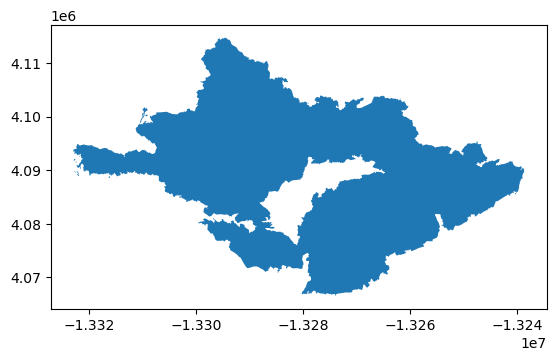

In [80]:
#select only thomas fire perimter 
thomas_fire = ca_fire[ca_fire.FIRE_NAME == "THOMAS"]
thomas_fire.plot()

## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


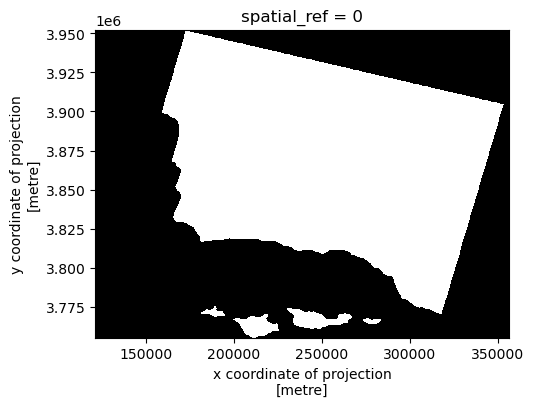

In [94]:

#select red green and blue variables, make an array and plot 
landsat_2d[['red', 'green', 'blue']].to_array().plot.imshow(size = 4)

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

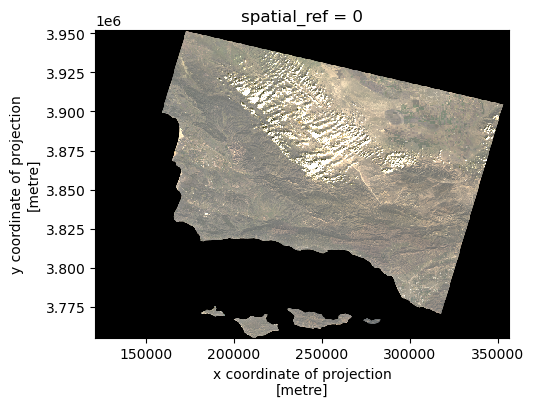

In [93]:
#select red green and blue variables, make an array and plot with robust = True
landsat_2d[['red', 'green', 'blue']].to_array().plot.imshow(size = 4, robust = True) 

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

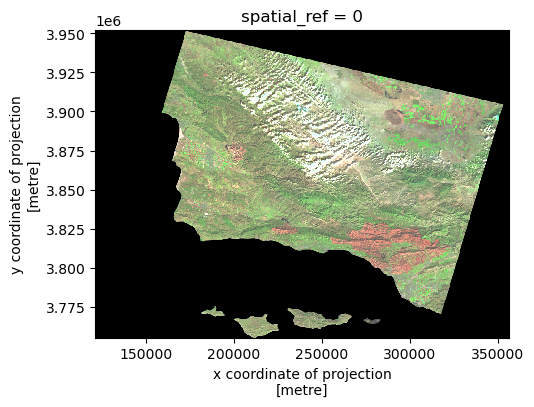

In [95]:
#select short wave, near infrared, and red variables, make an array and plot with robust = True
landsat_2d[[ 'swir22','nir08', 'red']].to_array().plot.imshow(size = 4, robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [98]:
# your code here

#check crs
print('matched crs?', thomas_fire.crs == landsat_2d.rio.crs)
thomas_fire= thomas_fire.to_crs(landsat_2d.rio.crs)
print('matched crs?', thomas_fire.crs == landsat_2d.rio.crs)



matched crs? True
matched crs? True


In [99]:
thomas_bounds = thomas_fire.bounds
xmin, ymin, xmax, ymax = thomas_bounds


## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

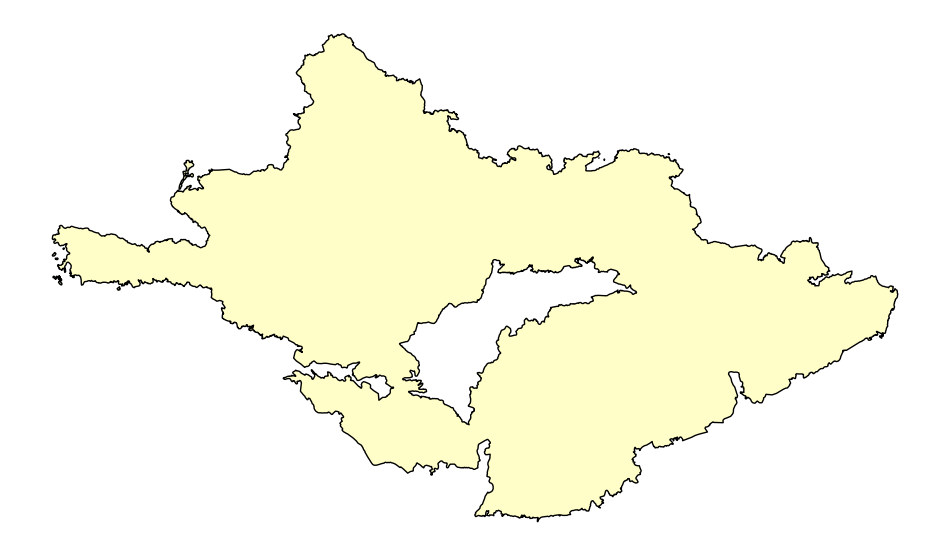

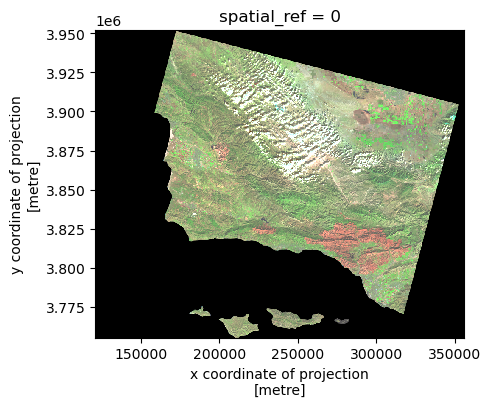

In [100]:
# your code here
fig, ax = plt.subplots(figsize = (12,8)) # set figure size and axis
ax.axis('off') # turn x and y axis off

# -------------------------
snr_array.plot.imshow(size = size, aspect = aspect, robust = True)
thomas_fire.plot(ax = ax, color = '#fffec8', edgecolor = 'black') # plot california map with black outline 

#---------------------------

#snr_array.plot.imshow(size = size, aspect = aspect, robust = True)
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)
#---------------------------

plt.show()  # show plot



## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.